In [1]:
import numpy as np 
import pandas as pd 
import os, cv2, random

TRAIN_DIR = 'train_equal_re/'
TEST_DIR = 'test_v2_re/'
ROWS = 224
COLS = 224
CHANNELS = 1
train_images = [TRAIN_DIR + i for i in os.listdir(TRAIN_DIR)]
test_images = [TEST_DIR + i for i in os.listdir(TEST_DIR)]
def read_image(file_path):
    img = cv2.imread(file_path, cv2.IMREAD_GRAYSCALE)
    return cv2.resize(img, (ROWS, COLS), interpolation = cv2.INTER_CUBIC)
def prep_data(images):
    count = len(images)
    data = np.ndarray((count, CHANNELS, ROWS, COLS), dtype = np.uint8)
    
    for i, image_file in enumerate(images):
        image = read_image(image_file)
        data[i] = image.T
        
        if i % 1 == 0:
            print ('Processed {} of {}'.format(i, count))
            
    return data

train = prep_data(train_images)
test = prep_data(test_images)

print("Train shape: {}".format(train.shape))
print("Test shape:  {}".format(test.shape))

Processed 0 of 24
Processed 1 of 24
Processed 2 of 24
Processed 3 of 24
Processed 4 of 24
Processed 5 of 24
Processed 6 of 24
Processed 7 of 24
Processed 8 of 24
Processed 9 of 24
Processed 10 of 24
Processed 11 of 24
Processed 12 of 24
Processed 13 of 24
Processed 14 of 24
Processed 15 of 24
Processed 16 of 24
Processed 17 of 24
Processed 18 of 24
Processed 19 of 24
Processed 20 of 24
Processed 21 of 24
Processed 22 of 24
Processed 23 of 24
Processed 0 of 63
Processed 1 of 63
Processed 2 of 63
Processed 3 of 63
Processed 4 of 63
Processed 5 of 63
Processed 6 of 63
Processed 7 of 63
Processed 8 of 63
Processed 9 of 63
Processed 10 of 63
Processed 11 of 63
Processed 12 of 63
Processed 13 of 63
Processed 14 of 63
Processed 15 of 63
Processed 16 of 63
Processed 17 of 63
Processed 18 of 63
Processed 19 of 63
Processed 20 of 63
Processed 21 of 63
Processed 22 of 63
Processed 23 of 63
Processed 24 of 63
Processed 25 of 63
Processed 26 of 63
Processed 27 of 63
Processed 28 of 63
Processed 29 

In [2]:
labels = []
for i in train_images:
    if 'Agnes' in i:
        labels.append(0)
    elif 'Alexander' in i:
        labels.append(1)
    elif 'Allyson' in i:
        labels.append(2)
    elif 'Amelia' in i:
        labels.append(3)
    elif 'Angelo' in i:
        labels.append(4)
    elif 'Anibal' in i:
        labels.append(5)
    elif 'Anthony' in i:
        labels.append(6)
    elif 'Yekaterina' in i:
        labels.append(7)
    else:
        labels.append(8)
        
train = train.reshape(-1,50176)
test = test.reshape(-1,50176)
X_train = train.astype('float32')
X_test = test.astype('float32')
X_train /= 255
X_test /= 255
Y_train = labels
X_train=np.array(X_train)
X_test=np.array(X_test)
Y_train=np.array(Y_train)
print(Y_train)
labels_test = []
for i in test_images:
    if 'Agnes' in i:
        labels_test.append(0)
    elif 'Alexander' in i:
        labels_test.append(1)
    elif 'Allyson' in i:
        labels_test.append(2)
    elif 'Amelia' in i:
        labels_test.append(3)
    elif 'Angelo' in i:
        labels_test.append(4)
    elif 'Anibal' in i:
        labels_test.append(5)
    elif 'Anthony' in i:
        labels_test.append(6)
    elif 'Yekaterina' in i:
        labels_test.append(7)
    else:
        labels_test.append(8)
Y_test = labels_test
Y_test = np.array(Y_test)
print(Y_test)
print("X_train.shape " + str(X_train.shape))
print("X_test.shape " + str(X_test.shape))

[3 3 3 7 6 1 5 5 1 6 0 7 6 5 1 7 4 4 4 0 2 2 0 2]
[7 3 3 7 7 3 3 7 3 6 6 3 7 7 3 6 1 2 2 0 6 1 0 2 2 0 1 1 0 2 0 1 1 0 2 2 0
 6 0 4 5 0 6 5 4 5 6 6 5 2 2 5 6 6 0 5 5 0 6 3 3 3 2]
X_train.shape (24, 50176)
X_test.shape (63, 50176)


In [3]:
from sklearn.decomposition import RandomizedPCA
pca = RandomizedPCA(n_components=90)
pca.fit(X_train)
transformed1 = pca.fit_transform(X_train)
transformed2 = pca.transform(X_test)

/Users/dhitithakkar/anaconda/lib/python3.6/site-packages/sklearn/utils/deprecation.py:57: DeprecationWarning: Class RandomizedPCA is deprecated; RandomizedPCA was deprecated in 0.18 and will be removed in 0.20. Use PCA(svd_solver='randomized') instead. The new implementation DOES NOT store whiten ``components_``. Apply transform to get them.
  warnings.warn(msg, category=DeprecationWarning)


In [4]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(transformed1, Y_train)
pred = knn.predict(transformed2)

In [5]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(Y_test,pred))

             precision    recall  f1-score   support

          0       0.21      0.27      0.24        11
          1       0.00      0.00      0.00         6
          2       0.00      0.00      0.00        10
          3       0.25      0.10      0.14        10
          4       0.00      0.00      0.00         2
          5       0.00      0.00      0.00         7
          6       0.00      0.00      0.00        11
          7       0.50      0.17      0.25         6

avg / total       0.12      0.08      0.09        63



/Users/dhitithakkar/anaconda/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


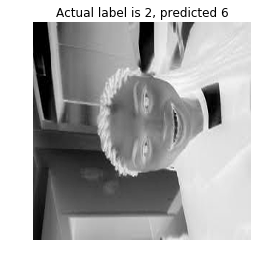

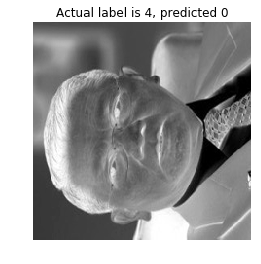

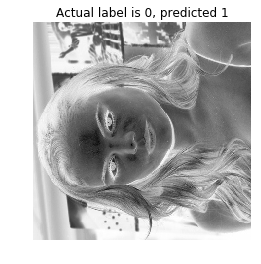

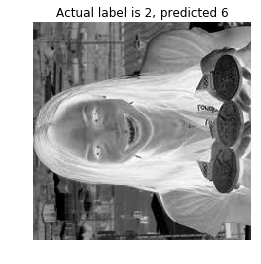

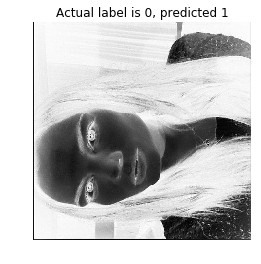

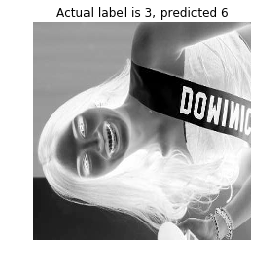

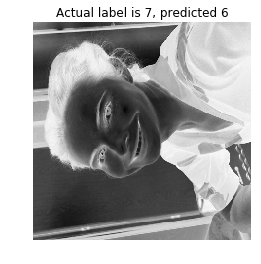

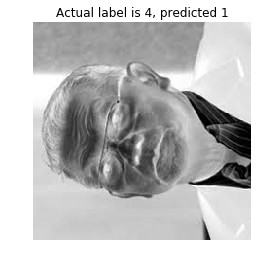

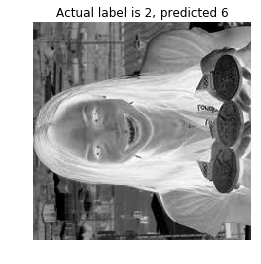

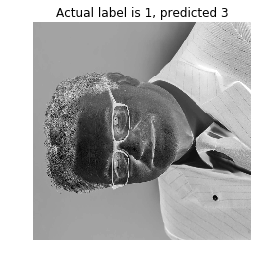

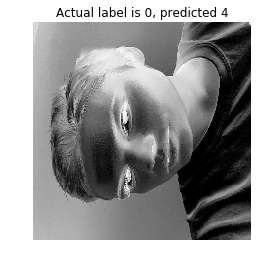

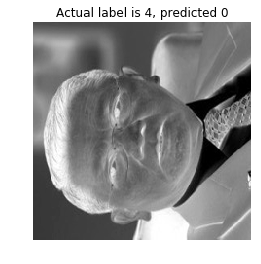

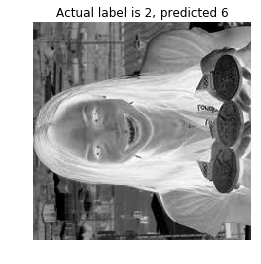

In [6]:
import matplotlib.pyplot as plt
for i in np.random.choice(np.arange(0, len(Y_test)), size = (13,)):
    pred = knn.predict(np.atleast_2d(transformed2[i]))
    image = (X_test[i] * 255).reshape((224, 224)).astype("uint8")	
    plt.figure()  
    plt.axis("off")
    plt.imshow(image, cmap=plt.cm.gray_r, interpolation='nearest')
    plt.title("Actual label is {0}, predicted {1}".format(Y_test[i], pred[0]))

plt.show()
